In [4]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import Libraries
import pandas_datareader as web
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Get Stock quote
df = web.DataReader('TSLA', data_source='yahoo', start='2011-01-01', end='2021-01-01')
print(df.shape)
df

(2517, 6)


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,5.400000,5.180000,5.36800,5.324000,6415000.0,5.324000
2011-01-04,5.390000,5.204000,5.33200,5.334000,5937000.0,5.334000
2011-01-05,5.380000,5.238000,5.29600,5.366000,7233500.0,5.366000
2011-01-06,5.600000,5.362000,5.36600,5.576000,10306000.0,5.576000
2011-01-07,5.716000,5.580000,5.60000,5.648000,11239500.0,5.648000
...,...,...,...,...,...,...
2020-12-24,666.090027,641.000000,642.98999,661.770020,22865600.0,661.770020
2020-12-28,681.400024,660.799988,674.51001,663.690002,32278600.0,663.690002
2020-12-29,669.900024,655.000000,661.00000,665.989990,22910800.0,665.989990


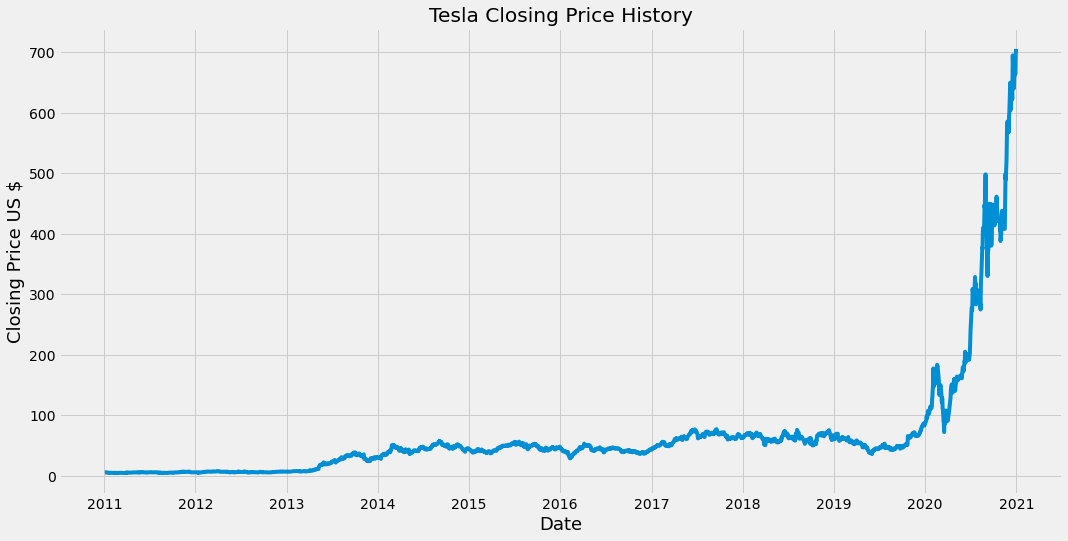

In [3]:
#Visualize closing price history
plt.figure(figsize=(16,8))
plt.title('Tesla Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price US $', fontsize=18)
plt.show()

In [4]:
# New Dataframe for just the close price column
data = df.filter(['Close'])
#Convert it to a numpy array
dataset = data.values

print(dataset.shape)
dataset

(2517, 1)


array([[  5.32399988],
       [  5.33400011],
       [  5.36600018],
       ...,
       [665.98999023],
       [694.7800293 ],
       [705.66998291]])

In [5]:
#get the number of rows to train the model on -> 80%
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

2014

In [6]:
# Scale the data - preprocessing
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
print(len(scaled_data))
scaled_data


2517


array([[0.00136603],
       [0.00138029],
       [0.00142592],
       ...,
       [0.9434197 ],
       [0.98447185],
       [1.        ]])

In [8]:
# print(len(train_data))
print(training_data_len)

2014


In [9]:
# Create the training dataset
train_data = scaled_data[0:training_data_len , :]
# Split the data
x_train = [] # features
y_train = [] # dependent variables

for i in range(365, len(train_data)):
    x_train.append(train_data[i-365:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 365:
        print(x_train)
        print(y_train)
        print()

[array([1.36602633e-03, 1.38028581e-03, 1.42591519e-03, 1.72535743e-03,
       1.82802268e-03, 1.88791154e-03, 1.46298901e-03, 1.46298901e-03,
       1.25195322e-03, 1.11791739e-03, 1.08654681e-03, 6.27402764e-04,
       2.25294589e-04, 3.45070942e-04, 7.58586292e-04, 8.12771222e-04,
       8.32733947e-04, 8.81215629e-04, 6.21698837e-04, 6.47365490e-04,
       5.93180560e-04, 6.01736111e-04, 5.13328978e-04, 4.64847976e-04,
       3.53626493e-04, 7.58586292e-04, 3.93552624e-04, 3.96404248e-04,
       4.04959799e-04, 3.56478797e-04, 2.88034389e-04, 8.27030700e-04,
       5.04773427e-04, 3.84997073e-04, 1.14071746e-05, 0.00000000e+00,
       1.99627936e-04, 5.07625731e-04, 5.87476633e-04, 6.01736111e-04,
       6.24550460e-04, 7.21513145e-04, 8.89770500e-04, 8.86918877e-04,
       8.07067974e-04, 8.24178396e-04, 6.21698837e-04, 6.38809939e-04,
       4.04959799e-04, 3.19404969e-04, 2.82331142e-04, 2.79478838e-04,
       3.22256593e-04, 2.56664489e-04, 1.02665932e-04, 1.08369179e-04,
     

In [10]:
# Convert to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
x_train.shape

(1649, 365)

In [12]:
#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1649, 365, 1)

In [13]:
#build LSTM model 
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [14]:
#compile model
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
# train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1649/1649 [==============================] - 315s 188ms/step - loss: 5.4432e-05


In [16]:
# Create the testing dataset
# Create a new array from 2014-2517
test_data = scaled_data[training_data_len - 365: , :]

# Create test data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(365, len(test_data)):
    x_test.append(test_data[i-365:i, 0])
    

In [17]:
#Convert data to numpy array
x_test = np.array(x_test)

In [18]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [19]:
# Get the Model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [20]:
# Get root mean squared error (RMSE)
# Use other evaluation methods to confirm how good the model is
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

23.886967645724773

In [21]:
#Plot data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

C:\Anaconda\envs\mlenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


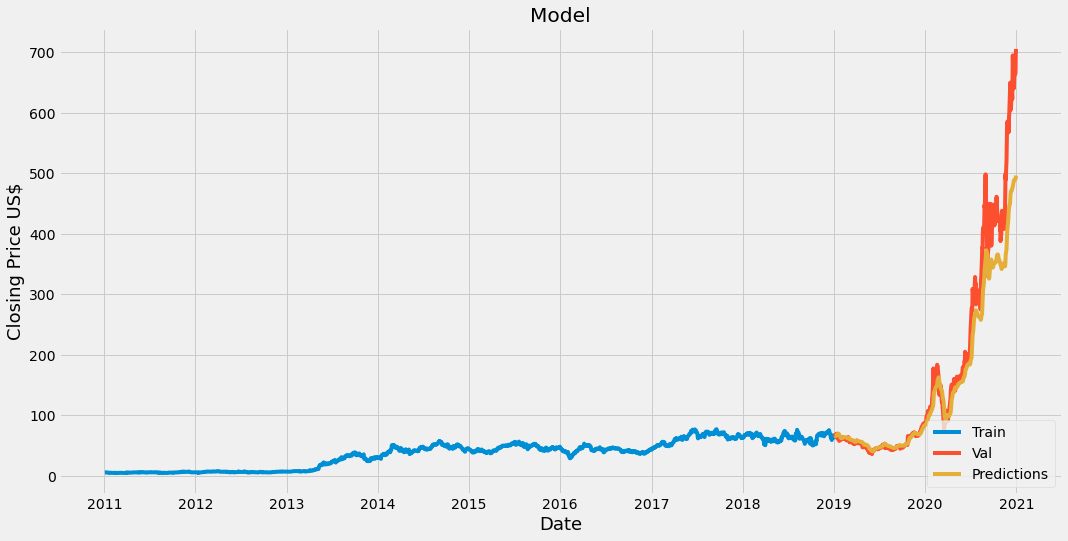

In [22]:
#Visualize
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price US$', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')


In [23]:
# Show the valid vs predicted prices
valid

,Close,Predictions
Date,,
2019-01-04,63.537998,65.548447
2019-01-07,66.991997,65.222298
2019-01-08,67.070000,65.451241
2019-01-09,67.706001,65.931633
2019-01-10,68.994003,66.548225
...,...,...
2020-12-24,661.770020,488.705231
2020-12-28,663.690002,489.660248
2020-12-29,665.989990,490.996033


In [34]:
# get the quote
tesla_quote = web.DataReader('TSLA', data_source='yahoo', start='2011-01-01', end='2021-09-15')

In [35]:
# New dataframe
new_df = tesla_quote.filter(['Close'])

#Get the last 365 days closing price values
last_365_days = new_df[-365:].values

# Scale the data
last_365_days_scaled = scaler.transform(last_365_days)

#Create empty list
X_test = []

# Append the last 365 days
X_test.append(last_365_days_scaled)

#Convert the X_test data to a numpy array
X_test = np.array(X_test)

# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the predicted scaled price
pred_price = model.predict(X_test)

# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[538.99445]]


In [36]:
# get the quote
tesla_quote2 = web.DataReader('TSLA', data_source='yahoo', start='2021-09-16', end='2023-09-16')
print(tesla_quote2)

                  High         Low  Open       Close    Volume   Adj Close
Date                                                                      
2021-09-15  756.859985  738.359985   745  755.830017  15357685  755.830017
